In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import svm

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [3]:
bin_df = pd.read_pickle('../data/bin_df.pkl')

In [5]:
bin_df.shape

(2886, 3)

In [ ]:
X = bin_df['string_tokens']
y = bin_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

## K-Neighbors Classifier

In [ ]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect, y_train)

print(classification_report(k_neighbors.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.18      0.57      0.27        46
           2       0.97      0.85      0.91       820

    accuracy                           0.84       866
   macro avg       0.58      0.71      0.59       866
weighted avg       0.93      0.84      0.88       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


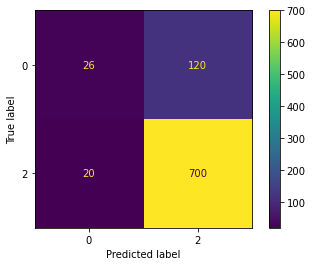

In [ ]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(X_train_vect, y_train)

RandomForestClassifier()

In [ ]:
y_preds = rfc.predict(X_test_vect)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


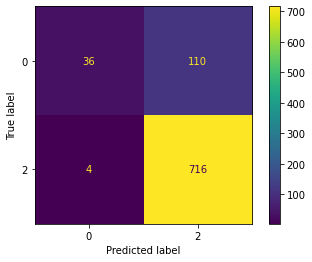

In [ ]:
plot_confusion_matrix(rfc, X_test_vect, y_test)

## Support Vector Classifier

In [ ]:
svcl = svm.SVC()

svcl.fit(X_train_vect, y_train)

y_pred_sv = svcl.predict(X_test_vect)

print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       1.00      0.19      0.32       146
           2       0.86      1.00      0.92       720

    accuracy                           0.86       866
   macro avg       0.93      0.60      0.62       866
weighted avg       0.88      0.86      0.82       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


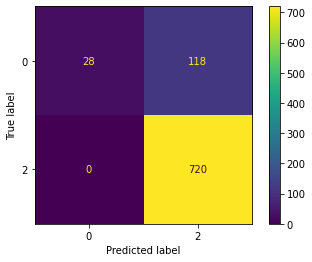

In [ ]:
plot_confusion_matrix(svcl, X_test_vect, y_test)

In [ ]:
print(classification_report(y_pred_sv, y_test))

              precision    recall  f1-score   support

           0       0.19      1.00      0.32        28
           2       1.00      0.86      0.92       838

    accuracy                           0.86       866
   macro avg       0.60      0.93      0.62       866
weighted avg       0.97      0.86      0.90       866



## Complementary Naive Bayes Classifier

In [ ]:
cnb = ComplementNB()

cnb.fit(X_train_vect, y_train)

y_preds_cnb = cnb.predict(X_test_vect)

print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.29      0.88      0.44        49
           2       0.99      0.87      0.93       817

    accuracy                           0.87       866
   macro avg       0.64      0.88      0.69       866
weighted avg       0.95      0.87      0.90       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


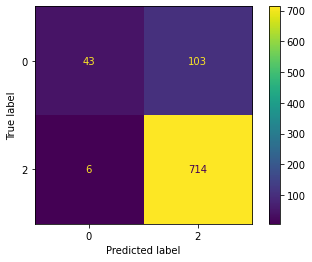

In [ ]:
plot_confusion_matrix(cnb, X_test_vect, y_test)

## Gradient Boost Classifier

In [ ]:
gboost = GradientBoostingClassifier()

gboost.fit(X_train_vect, y_train)

y_preds_gboost = gboost.predict(X_test_vect)

print(classification_report(y_test, y_preds_gboost))

              precision    recall  f1-score   support

           0       0.75      0.14      0.24       146
           2       0.85      0.99      0.92       720

    accuracy                           0.85       866
   macro avg       0.80      0.57      0.58       866
weighted avg       0.83      0.85      0.80       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


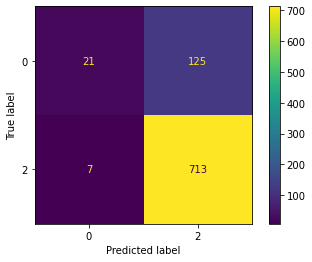

In [ ]:
plot_confusion_matrix(gboost, X_test_vect, y_test)

# Rinse, SMOTE, Repeat

In [ ]:
oversample = SMOTE()
X_train_vect_smote, y_smote = oversample.fit_resample(X_train_vect, y_train)

## Complementary Naive Bayes Classifier (w/ SMOTE)

In [ ]:
cnb = ComplementNB()

cnb.fit(X_train_vect_smote, y_smote)

y_preds_cnb = cnb.predict(X_test_vect)

print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.60      0.44      0.51       200
           2       0.84      0.91      0.88       666

    accuracy                           0.80       866
   macro avg       0.72      0.68      0.69       866
weighted avg       0.79      0.80      0.79       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


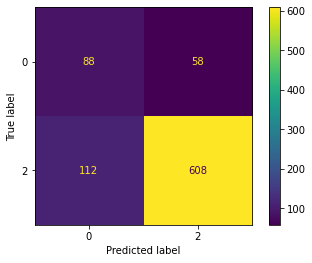

In [ ]:
plot_confusion_matrix(cnb, X_test_vect, y_test)

## Gradient Boosting Classifier (w/ SMOTE)

In [ ]:
gboost = GradientBoostingClassifier()

gboost.fit(X_train_vect_smote, y_smote)

y_preds_gboost = gboost.predict(X_test_vect)

print(classification_report(y_test, y_preds_gboost))

              precision    recall  f1-score   support

           0       0.47      0.32      0.38       146
           2       0.87      0.93      0.90       720

    accuracy                           0.83       866
   macro avg       0.67      0.62      0.64       866
weighted avg       0.80      0.83      0.81       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


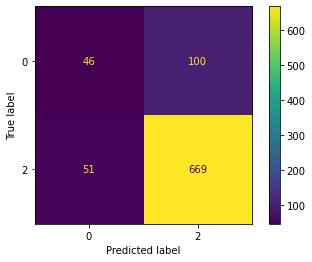

In [ ]:
plot_confusion_matrix(gboost, X_test_vect, y_test)

## Support Vector Classifier (w/ SMOTE)

In [ ]:
svcl = svm.SVC()

svcl.fit(X_train_vect_smote, y_smote)

y_pred_sv = svcl.predict(X_test_vect)

print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.92      0.25      0.39       146
           2       0.87      1.00      0.93       720

    accuracy                           0.87       866
   macro avg       0.90      0.62      0.66       866
weighted avg       0.88      0.87      0.84       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


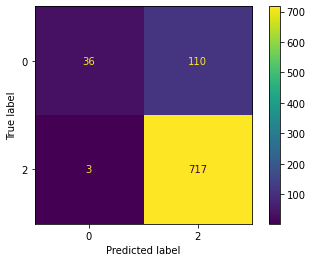

In [ ]:
plot_confusion_matrix(svcl, X_test_vect, y_test)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svcl, param_grid, refit = True)

grid.fit(X_train_vect, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
print(grid.best_params_)
 
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [ ]:
best_svcl = grid.best_estimator_

best_svcl.fit(X_train_vect_smote, y_smote)

y_pred_sv = best_svcl.predict(X_test_vect)

print(classification_report(y_test, y_pred_sv))


              precision    recall  f1-score   support

           0       0.77      0.40      0.53       146
           2       0.89      0.97      0.93       720

    accuracy                           0.88       866
   macro avg       0.83      0.69      0.73       866
weighted avg       0.87      0.88      0.86       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


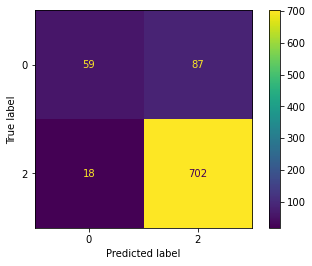

In [ ]:
plot_confusion_matrix(best_svcl, X_test_vect, y_test)

## K-Neighbors Classifier (w/ SMOTE)

In [ ]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect_smote, y_smote)

print(classification_report(k_neighbors.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.96      0.20      0.32       716
           2       0.20      0.96      0.33       150

    accuracy                           0.33       866
   macro avg       0.58      0.58      0.33       866
weighted avg       0.83      0.33      0.33       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


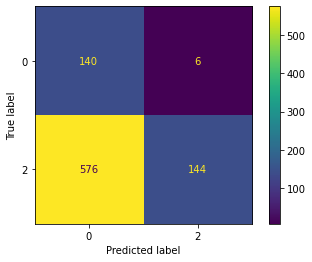

In [ ]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)